tensor(0.5368, grad_fn=<MseLossBackward0>)
tensor(183.5815, grad_fn=<MseLossBackward0>)
tensor(28.0625, grad_fn=<MseLossBackward0>)
tensor(22.1097, grad_fn=<MseLossBackward0>)
tensor(13.0549, grad_fn=<MseLossBackward0>)
tensor(8.4269, grad_fn=<MseLossBackward0>)
tensor(6.8550, grad_fn=<MseLossBackward0>)
tensor(6.5144, grad_fn=<MseLossBackward0>)
tensor(5.9092, grad_fn=<MseLossBackward0>)
tensor(5.2883, grad_fn=<MseLossBackward0>)
tensor(3.6765, grad_fn=<MseLossBackward0>)
tensor(2.9746, grad_fn=<MseLossBackward0>)
tensor(2.1783, grad_fn=<MseLossBackward0>)
tensor(1.8612, grad_fn=<MseLossBackward0>)
tensor(1.4561, grad_fn=<MseLossBackward0>)
tensor(1.2179, grad_fn=<MseLossBackward0>)
tensor(0.8618, grad_fn=<MseLossBackward0>)
tensor(0.6481, grad_fn=<MseLossBackward0>)
tensor(0.6587, grad_fn=<MseLossBackward0>)
tensor(0.8953, grad_fn=<MseLossBackward0>)
tensor(0.7608, grad_fn=<MseLossBackward0>)
tensor(0.7468, grad_fn=<MseLossBackward0>)
tensor(0.7799, grad_fn=<MseLossBackward0>)
tensor

torch.Size([20, 100])

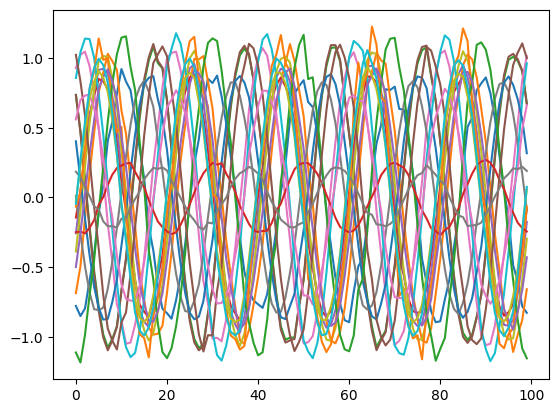

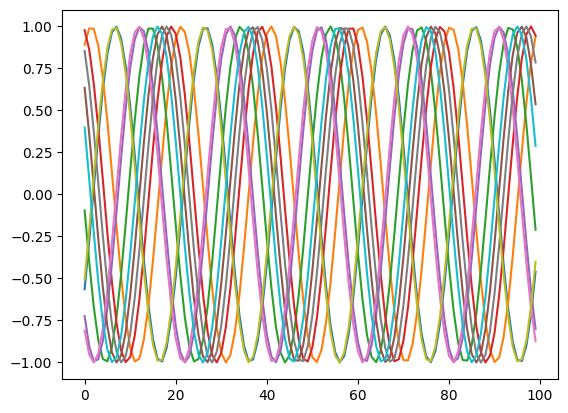

In [1]:
import torch
import torch.nn as nn
from infopath.losses import population_average_loss
import matplotlib.pyplot as plt
from geomloss import SamplesLoss

# The dataset
T = 100
K = 200
t = torch.arange(T)
data = torch.zeros(K, T)
for i, phi in enumerate(torch.arange(K)/K*360):
    data[i] = torch.cos(2*3.14*100*t + phi)

# The model
mlp = nn.Sequential(nn.Linear(10, 1000), nn.ReLU(), nn.Linear(1000, T))
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.1, weight_decay=0.)
sink_loss = SamplesLoss(loss="sinkhorn", p=1, blur=0.01)

# The training 
epochs = 350
for i in range(epochs):
    inp = torch.randn(200, 10)
    out = mlp(inp)
    loss = population_average_loss(data, out)
    # loss = sink_loss(data, out)
    loss.backward()
    print(loss)
    optimizer.step()
    mlp.zero_grad()

# Visualization
inp = torch.randn(20, 10)
out = mlp(inp)
plt.figure()
plt.plot(out.cpu().detach().T)
plt.figure()
plt.plot(data.cpu().detach()[torch.randint(200, size=(10,))].T)
out.shape